In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv('preprocess.csv')
d.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,terms_compl
0,0,16000,16000,60,12.74,361.93,C,10,MORTGAGE,130000.0,...,42.0,79.0,0.0,0.0,0.0,0,0.0,42.0,0.0,13.0
1,1,11875,11875,36,11.44,391.26,B,10,MORTGAGE,55000.0,...,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
2,2,26000,26000,60,15.99,632.14,C,10,RENT,52000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
3,3,35000,35000,36,19.99,1300.55,D,10,MORTGAGE,80000.0,...,4.0,0.0,48.0,0.0,0.0,0,48.0,48.0,0.0,23.0
4,4,14000,14000,60,12.74,316.69,C,4,OWN,40000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0


In [3]:
d=d[d['loan_status']!=2]

In [4]:
cat = d[['term',  'grade','issue_d', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 
     'disbursement_method','debt_settlement_flag', 'verification_status_joint']]
d1=pd.get_dummies(data=d,columns=cat.columns,drop_first=True)
d1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
d1train=d1[d1['loan_status']!=2]
d1current=d1[d1['loan_status']==2]

# Without Feature Selection

In [6]:
from sklearn.model_selection import train_test_split
xvif=d1train.drop(['loan_status','loan_amnt','out_prncp_inv','total_pymnt','open_acc','total_acc','installment','total_pymnt','total_pymnt_inv',
          'tot_cur_bal','total_bal_il','open_rv_12m','acc_open_past_24mths','num_sats','num_actv_rev_tl','total_bal_ex_mort',
          'total_bc_limit','addr_state_CA','application_type_1','grade_B','grade_C','grade_D','grade_E','grade_F','grade_G',
          'sec_app_open_acc','num_rev_accts','total_rev_hi_lim','pub_rec','revol_bal','last_pymnt_amnt','out_prncp'],axis=1)
yvif=d1train['loan_status']
X_trainvif,X_testvif,y_trainvif,y_testvif= train_test_split(xvif,yvif,test_size=0.3,random_state=1)

In [8]:
from pycaret.classification import *

clf1 = setup(data = d, 
             target = 'loan_status',
             numeric_imputation = 'mean',
             silent = True)

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.9994,0.9996,0.997,1,0.9985,0.9981
1,CatBoost Classifier,0.9993,0.9997,0.9967,1,0.9983,0.9979
2,Gradient Boosting Classifier,0.9989,0.9996,0.9951,0.9998,0.9974,0.9968
3,Extreme Gradient Boosting,0.9989,0.9995,0.9949,1,0.9974,0.9967
4,Logistic Regression,0.9988,0.9991,0.9944,0.9998,0.9971,0.9963
5,Ada Boost Classifier,0.9983,0.9994,0.9942,0.998,0.9961,0.995
6,Decision Tree Classifier,0.9976,0.9964,0.9945,0.9941,0.9943,0.9928
7,SVM - Linear Kernel,0.9956,0,0.9817,0.9974,0.9895,0.9867
8,Random Forest Classifier,0.9906,0.9987,0.9565,0.9989,0.9772,0.9713
9,Extra Trees Classifier,0.9852,0.9988,0.9337,0.9961,0.9639,0.9546


In [9]:
cc=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9996,0.9989,0.9980,1.0,0.9990,0.9988
1,0.9988,0.9991,0.9945,1.0,0.9972,0.9965
2,0.9997,1.0000,0.9984,1.0,0.9992,0.9990
3,0.9995,0.9998,0.9976,1.0,0.9988,0.9985
4,0.9997,1.0000,0.9984,1.0,0.9992,0.9990
5,0.9990,0.9998,0.9953,1.0,0.9976,0.9970
6,0.9993,0.9995,0.9965,1.0,0.9982,0.9978
7,0.9998,1.0000,0.9992,1.0,0.9996,0.9995
8,0.9988,0.9991,0.9941,1.0,0.9970,0.9963
9,0.9995,1.0000,0.9976,1.0,0.9988,0.9985


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

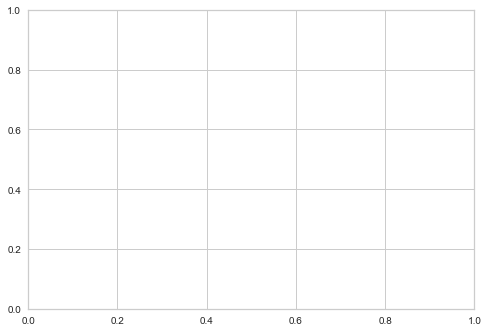

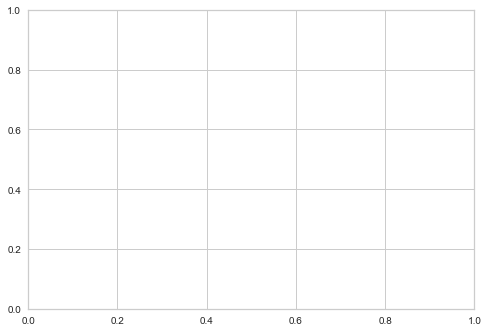

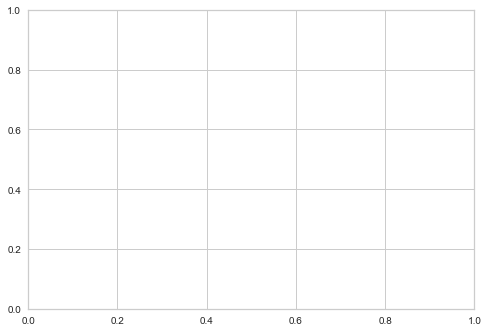

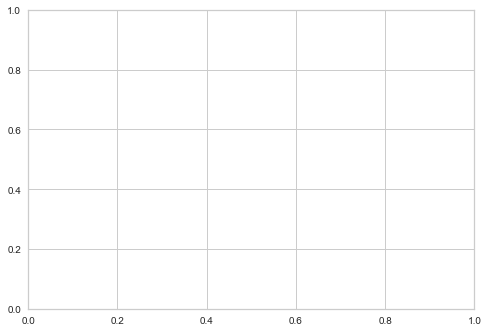

In [10]:
evaluate_model(cc)

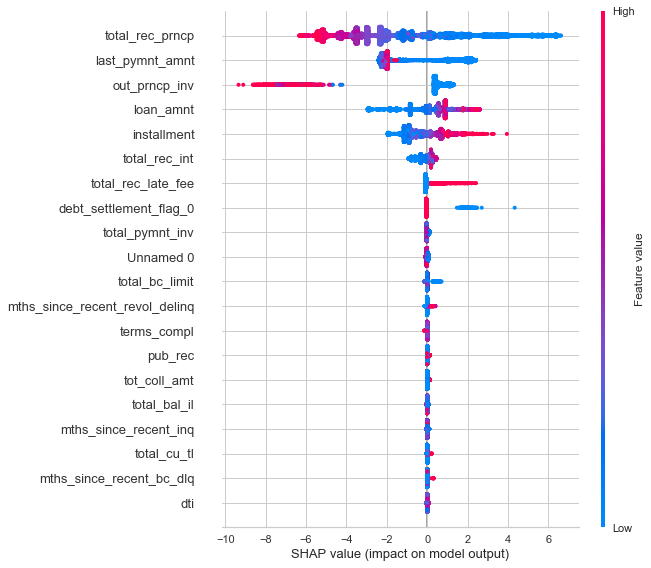

In [18]:
interpret_model(cc)

In [11]:
d3=d[['funded_amnt','loan_status', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
 'revol_util', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'collections_12_mths_ex_med',
 'acc_now_delinq', 'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util',
 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_sats',
 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
 'total_il_high_credit_limit', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_revol_util',
 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'terms_compl',
 'home_ownership','term','verification_status','issue_d','initial_list_status','purpose']]



In [12]:
from pycaret.classification import *

clf1 = setup(data = d3, 
             target = 'loan_status',
             numeric_imputation = 'mean',
             categorical_features = ['home_ownership','term','verification_status','issue_d','initial_list_status','purpose'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6759
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(171815, 82)"
4,Missing Values,False
5,Numeric Features,74
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9884,0.9986,0.9538,0.991,0.972,0.9647
1,Light Gradient Boosting Machine,0.9871,0.9985,0.9511,0.9875,0.969,0.9608
2,Extreme Gradient Boosting,0.9809,0.9971,0.9466,0.9625,0.9545,0.9424
3,Gradient Boosting Classifier,0.9803,0.9968,0.9447,0.9617,0.9531,0.9407
4,Decision Tree Classifier,0.9766,0.9656,0.9465,0.9431,0.9448,0.9299
5,Ada Boost Classifier,0.9652,0.9926,0.9158,0.9198,0.9177,0.8957
6,Random Forest Classifier,0.9428,0.9805,0.7756,0.9445,0.8517,0.8167
7,Logistic Regression,0.9399,0.9768,0.8356,0.8751,0.8549,0.817
8,Extra Trees Classifier,0.9254,0.9874,0.6605,0.9814,0.7895,0.7463
9,SVM - Linear Kernel,0.9134,0,0.8451,0.8056,0.798,0.7462


In [14]:
rfelgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9881,0.9984,0.9517,0.9918,0.9713,0.9639
1,0.9878,0.9989,0.9537,0.9882,0.9706,0.9629
2,0.9872,0.9986,0.9545,0.9846,0.9693,0.9612
3,0.9858,0.9976,0.9466,0.9857,0.9658,0.9568
4,0.9871,0.9987,0.9517,0.9870,0.9690,0.9609
5,0.9874,0.9985,0.9529,0.9874,0.9698,0.9619
6,0.9873,0.9982,0.9505,0.9890,0.9694,0.9613
7,0.9852,0.9984,0.9419,0.9876,0.9642,0.9549
8,0.9868,0.9987,0.9490,0.9881,0.9682,0.9598
9,0.9884,0.9989,0.9588,0.9859,0.9721,0.9648


In [15]:
evaluate_model(rfelgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

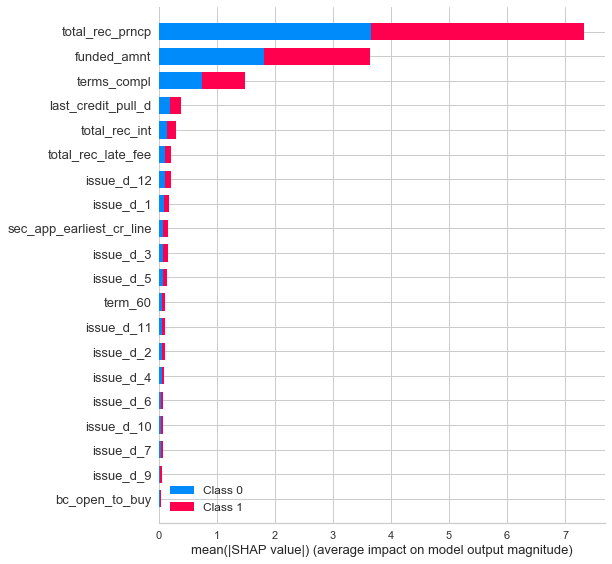

In [17]:
interpret_model(rfelgbm)

# H2O AI AutoML

In [6]:
import findspark
findspark.init()
from pysparkling import *
from pyspark.sql import SparkSession
import h2o

In [7]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from C:\Users\Arun\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Arun\AppData\Local\Temp\tmp7lhqkgkk
  JVM stdout: C:\Users\Arun\AppData\Local\Temp\tmp7lhqkgkk\h2o_Arun_started_from_python.out
  JVM stderr: C:\Users\Arun\AppData\Local\Temp\tmp7lhqkgkk\h2o_Arun_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,12 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 6 months and 7 days !!!"
H2O cluster name:,H2O_from_python_Arun_1pjtqr
H2O cluster total nodes:,1
H2O cluster free memory:,14.22 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [8]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(d1train,test_size=0.3,random_state=1)

In [9]:
train1=train.drop('loan_status',axis=1)
test1=test.drop('loan_status',axis=1)
y_train=train['loan_status']
y_test=test['loan_status']
htrain =h2o.H2OFrame(train)
htest=h2o.H2OFrame(test)

Method .as_matrix will be removed in a future version. Use .values instead.


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
htrain

loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,terms_compl,term_60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_d_2,issue_d_3,issue_d_4,issue_d_5,issue_d_6,issue_d_7,issue_d_8,issue_d_9,issue_d_10,issue_d_11,issue_d_12,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_1,pymnt_plan_1,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_personal,purpose_small_business,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_1,application_type_1,hardship_flag_1,disbursement_method_1,debt_settlement_flag_1,verification_status_joint_1
14600,14600,29.49,615.73,10,86000,1,7.52,0,324,2,4,0,17855,59.1,14,0,0,5018.89,5018.89,1349.39,1705.34,0,615.73,11,0,0,0,17855,1,0,0,0,97,0,0,1,2,1810,59,30200,2,7,2,2,4464,2873,44.8,0,0,124,323,2,2,0,21,1,0,3,4,3,5,4,4,10,4,4,0,0,0,1,100,0,0,0,30200,17855,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35000,35000,30.74,1148.33,3,160000,0,13.22,0,200,0,14,0,94593,93.2,23,0,0,51887.8,51887.8,35000,16887.8,0,30189,21,0,0,0,513685,2,0,1,1,11,0,0,1,3,29536,93,101500,3,1,3,6,36692,5432,93.3,0,0,11,200,2,2,4,13,3,0,7,10,9,12,1,12,18,10,14,0,0,0,3,100,77.8,0,0,538750,94593,81500,0,564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20000,20000,15.05,476.33,3,70000,0,13.66,1,249,0,21,0,6848,21.1,40,0,0,23046,23046,20000,3046.04,0,17363.5,17,1,0,92,177951,2,12,0,2,18,41424,99,2,2,2946,65,32500,0,0,1,5,8474,19250,23.9,0,0,249,145,3,3,2,3,6,1,4,6,5,5,27,8,10,6,21,0,0,0,3,90,20,0,0,204573,48272,25300,42073,0,0,0,0,0,0,0,0,0,0,7,0,63,0,

In [15]:
x=htrain.columns
y='loan_status'
x.remove(y)
aml=H2OAutoML(max_runtime_secs=3600,seed=1,stopping_metric='logloss',sort_metric='auc')
aml.train(x=x,y=y,training_frame=htrain)
lb=aml.leaderboard
print(lb)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_4_AutoML_20200504_063100,0.000776022,0.0278572,0.000776022,0.00425493,0.0192578
StackedEnsemble_AllModels_AutoML_20200504_063100,0.000777394,0.0278818,0.000777394,0.00419075,0.0189378
StackedEnsemble_BestOfFamily_AutoML_20200504_063100,0.00078177,0.0279602,0.00078177,0.00423712,0.0190724
GBM_3_AutoML_20200504_063100,0.000814323,0.0285363,0.000814323,0.00467621,0.0196467
GBM_2_AutoML_20200504_063100,0.000873435,0.0295539,0.000873435,0.00556678,0.0204
DRF_1_AutoML_20200504_063100,0.00092982,0.0304929,0.00092982,0.00360371,0.0209284
XRT_1_AutoML_20200504_063100,0.000949826,0.0308193,0.000949826,0.003858,0.0212256
GBM_1_AutoML_20200504_063100,0.000985214,0.0313881,0.000985214,0.0068359,0.02185
GLM_grid_1_AutoML_20200504_063100_model_1,0.0481654,0.219466,0.0481654,0.15249,0.145388


In [12]:
print("Predictions")
test_y=aml.leader.predict(htest)
test_y=test_y.as_data_frame()

Predictions
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

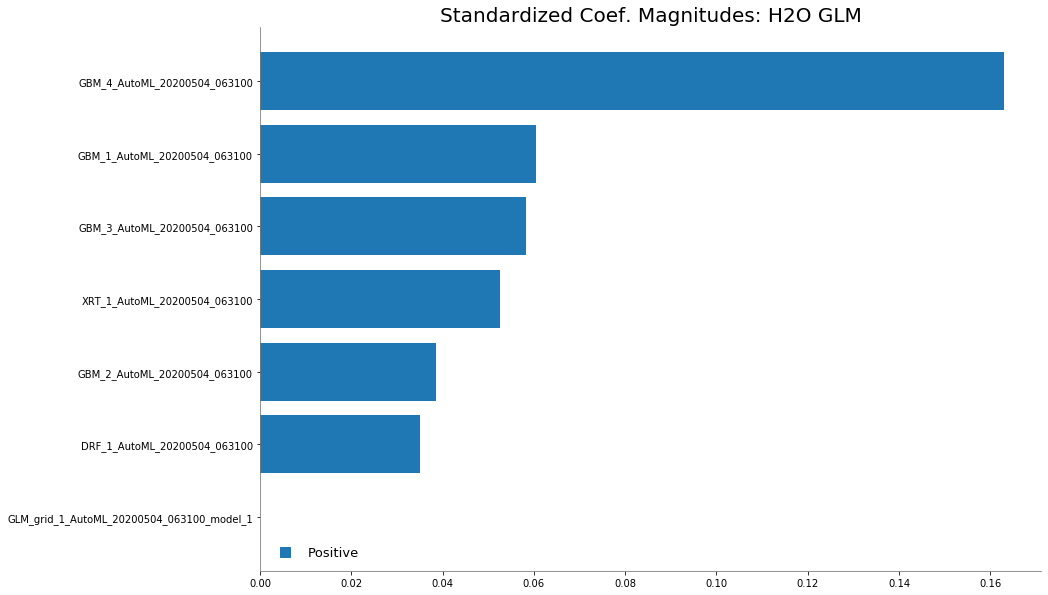

In [14]:
%matplotlib inline
metalearner.std_coef_plot()